In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from matplotlib.ticker import FuncFormatter, PercentFormatter

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_drug_data = pd.merge(clinical_trial_data, mouse_drug_data, how="outer", on="Mouse ID" )

# Display the data table for preview
combined_drug_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_grouped = combined_drug_data.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug", "Timepoint"])
mean_tumor_volume = tumor_response_grouped["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame({"Mean Tumour Volume": mean_tumor_volume})

# Preview DataFrame
mean_tumor_volume_df.head()

Mean Tumour Volume
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_volume = tumor_response_grouped["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
std_error_tumor_volume_df = pd.DataFrame({"Standard Error of Mean": std_error_tumor_volume})

# Preview DataFrame
std_error_tumor_volume_df.head()

Standard Error of Mean
Drug      Timepoint                        
Capomulin 0                        0.000000
          5                        0.448593
          10                       0.702684
          15                       0.838617
          20                       0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_pivot = pd.pivot_table(mean_tumor_volume_df, values='Mean Tumour Volume', index='Timepoint', columns='Drug')
std_error_tumor_volume_pivot = pd.pivot_table(std_error_tumor_volume_df, values='Standard Error of Mean', 
                                              index='Timepoint', columns='Drug')
# Preview that Reformatting worked
mean_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
std_error_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


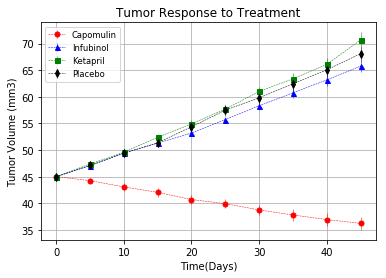

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot["Capomulin"], std_error_tumor_volume_pivot["Capomulin"], 
            fmt="o", markersize=5, linestyle= "--", color="r", label = "Capomulin", linewidth=0.5)
ax.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot["Infubinol"], std_error_tumor_volume_pivot["Infubinol"], 
            fmt="^",  markersize=5, linestyle= "--", color="b", label = "Infubinol", linewidth=0.5)
ax.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot["Ketapril"], std_error_tumor_volume_pivot["Ketapril"], 
            fmt="s", markersize=5, linestyle= "--", color="g", label = "Ketapril", linewidth=0.5)
ax.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot["Placebo"], std_error_tumor_volume_pivot["Placebo"], 
            fmt="d", markersize=5, linestyle= "--", color="black", label = "Placebo", linewidth=0.5)
plt.legend(loc="best", fontsize="small")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.savefig("Tumor Response to Treatment.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_data = combined_drug_data.loc[:,["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"])
mean_metastatic_sites = metastatic_data["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_df = pd.DataFrame({"Mean Metastatic Sites": mean_metastatic_sites})

# Preview DataFrame
mean_metastatic_df.head()

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_metastatic = metastatic_data["Metastatic Sites"].sem()

# Convert to DataFrame
std_error_metastatic_df = pd.DataFrame({"Standard Error of Mean": std_error_metastatic})

# Preview DataFrame
std_error_metastatic_df.head()

Standard Error of Mean
Drug      Timepoint                        
Capomulin 0                        0.000000
          5                        0.074833
          10                       0.125433
          15                       0.132048
          20                       0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_pivot = pd.pivot_table(mean_metastatic_df, values='Mean Metastatic Sites', index='Timepoint', columns='Drug')
std_error_metastatic_pivot = pd.pivot_table(std_error_metastatic_df, values='Standard Error of Mean', 
                                            index='Timepoint', columns='Drug')

# Preview that Reformatting worked
mean_metastatic_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
std_error_metastatic_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


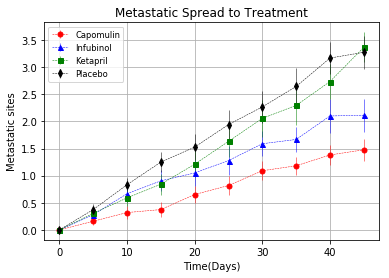

In [11]:
# Generate the Plot (with Error Bars)
fig2, mx = plt.subplots()
mx.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Capomulin"], std_error_metastatic_pivot["Capomulin"], 
            fmt="o", markersize=5, linestyle= "--", color="r", label = "Capomulin", linewidth=0.5)
mx.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Infubinol"], std_error_metastatic_pivot["Infubinol"], 
            fmt="^",  markersize=5, linestyle= "--", color="b", label = "Infubinol", linewidth=0.5)
mx.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Ketapril"], std_error_metastatic_pivot["Ketapril"], 
            fmt="s", markersize=5, linestyle= "--", color="g", label = "Ketapril", linewidth=0.5)
mx.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Placebo"], std_error_metastatic_pivot["Placebo"], 
            fmt="d", markersize=5, linestyle= "--", color="black", label = "Placebo", linewidth=0.5)
plt.legend(loc="best", fontsize="small")
plt.title("Metastatic Spread to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Metastatic sites")
plt.grid()
# Save the Figure
plt.savefig("Metastatic Spread to Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_data = combined_drug_data.loc[:,["Drug", "Timepoint", "Mouse ID"]].groupby(["Drug", "Timepoint"])
mice_count = mice_data.count()

# Convert to DataFrame
mice_count_df = mice_count.rename(columns= {"Mouse ID": "Mice Count"})

# Preview DataFrame
mice_count_df.head()

Mice Count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = pd.pivot_table(mice_count_df, values='Mice Count', index='Timepoint', columns='Drug')

# Preview the Data Frame
mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
min_ylimit= min(mice_count_pivot.loc[:,['Capomulin','Infubinol','Placebo','Ketapril']].min())

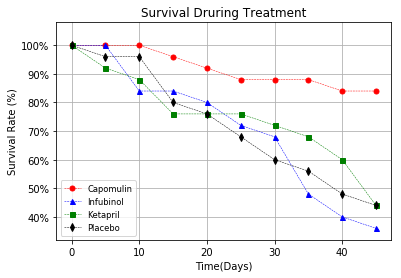

In [15]:
# Generate the Plot (Accounting for percentages)

fig3, cx=plt.subplots()
cx.plot(mice_count_pivot.index, mice_count_pivot["Capomulin"], marker="o", 
        markersize=5, linestyle= "--", color="r", label = "Capomulin", linewidth=0.5)
cx.plot(mice_count_pivot.index, mice_count_pivot["Infubinol"], marker="^", 
        markersize=5, linestyle= "--", color="b", label = "Infubinol", linewidth=0.5)
cx.plot(mice_count_pivot.index, mice_count_pivot["Ketapril"], marker="s", 
        markersize=5, linestyle= "--", color="g", label = "Ketapril", linewidth=0.5)
cx.plot(mice_count_pivot.index, mice_count_pivot["Placebo"], marker="d", 
        markersize=5, linestyle= "--", color="black", label = "Placebo", linewidth=0.5)
cx.yaxis.set_major_formatter(PercentFormatter(xmax=mice_count_pivot["Capomulin"][0]))
plt.legend(loc="best", fontsize="small")
plt.title("Survival Druring Treatment")
plt.xticks
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.ylim(min_ylimit -1, mice_count_pivot["Capomulin"][0]+2)
plt.grid()
# Save the Figure
plt.savefig("Survival During Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
group_drug = combined_drug_data.set_index(["Drug"])

#Isolate the data for Day 0 and Day 45 grouped by drug
vol_day_0 = group_drug.loc[(group_drug["Timepoint"] == 0), "Tumor Volume (mm3)"].groupby("Drug")
vol_day_45 = group_drug.loc[(group_drug["Timepoint"] == 45), "Tumor Volume (mm3)"].groupby("Drug")

mean_volume_day_0 = vol_day_0.mean()
mean_volume_day_45 = vol_day_45.mean()
percent_change = ((mean_volume_day_45 - mean_volume_day_0)/mean_volume_day_0)*100
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Store all Relevant Percent Changes into a Tuple
tuple_change = (percent_change['Capomulin'], percent_change['Infubinol'], percent_change['Ketapril'], percent_change['Placebo'])
tuple_change

(-19.475302667894155, 46.12347172785184, 57.02879468660604, 51.29796048315153)

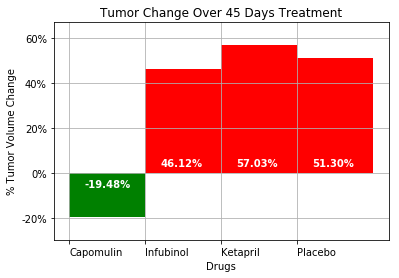

In [18]:
# Splice the data between passing and failing drugs
change_color = []
text_place = []
for value in tuple_change:
    if value < 0:
        change_color.append("g")
        text_place.append(-6)
    else:
        change_color.append("r")
        text_place.append(3)
        

drug_names = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
x_axis = np.arange(0, 4)
        
# Orient widths. Add labels, tick marks, etc. 
ytick_min = min(tuple_change)
ytick_max = max(tuple_change)

# plt.subplot to manipulate the axes

fig5, sx = plt.subplots()        
sx.bar(x_axis, tuple_change, color= change_color, width = 1, align='edge')
plt.xticks(x_axis, drug_names, horizontalalignment='left')
plt.grid()
plt.title("Tumor Change Over 45 Days Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.ylim(ytick_min-10,ytick_max+10,20)
# Use functions to label the percentages of changes
sx.yaxis.set_major_formatter(PercentFormatter())



# Call functions to implement the function calls
for x,y,z in zip(x_axis, tuple_change, text_place): 
    sx.text(x+.2, z, '{:0.2f}%'.format(y), color = "w", horizontalalignment='left', fontweight='bold')

# Save the Figure
plt.savefig("Tumor Change Over 45 Days Treatment.png")

# Show the Figure
fig.show()

## Observations:
***
1. The drug 'Capomulin' has clearly passed the clinical test. Significant reduction in tumor volume and lower rate of metastatic spread are observed among the mice treated with this drug. The survival rate of mice is also much higher for this drug than for placebo or the other two drugs.<br><br>

2. Although the drug 'Infubinol' performed slightly better than 'Placebo' and 'Ketapril' on the tumor volume growth and metastatic spread but the survival rate among mice was worse. So clearly this drug does not pass the clinical test.<br><br>

3. The standard error of mean of the sampled test data is small and non-overlapping which suggests that the sample mean of the data is largely accurate reflection of the true population mean. In short, the test is believable and accurate.<br><br>
***